In [1]:
df<-read.csv('d:/data/wine/winequality-red2.csv')
head(df)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,class
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,0
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,0
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,1
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,0


In [2]:
library(dplyr)
df<-df %>% select(-class)

#데이터프레임의 변수들의 자료형 확인
str(df)
#quality 필드를 숫자형이 아닌 팩터형(카테고리형)
df$quality<-as.factor(df$quality)
str(df)

dim(df)
head(df)

Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



'data.frame':	1599 obs. of  12 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...
'data.frame':	1599 obs. of  12 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8

[1] 1599   12

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5



  3   4   5   6   7   8 
 10  53 681 638 199  18 

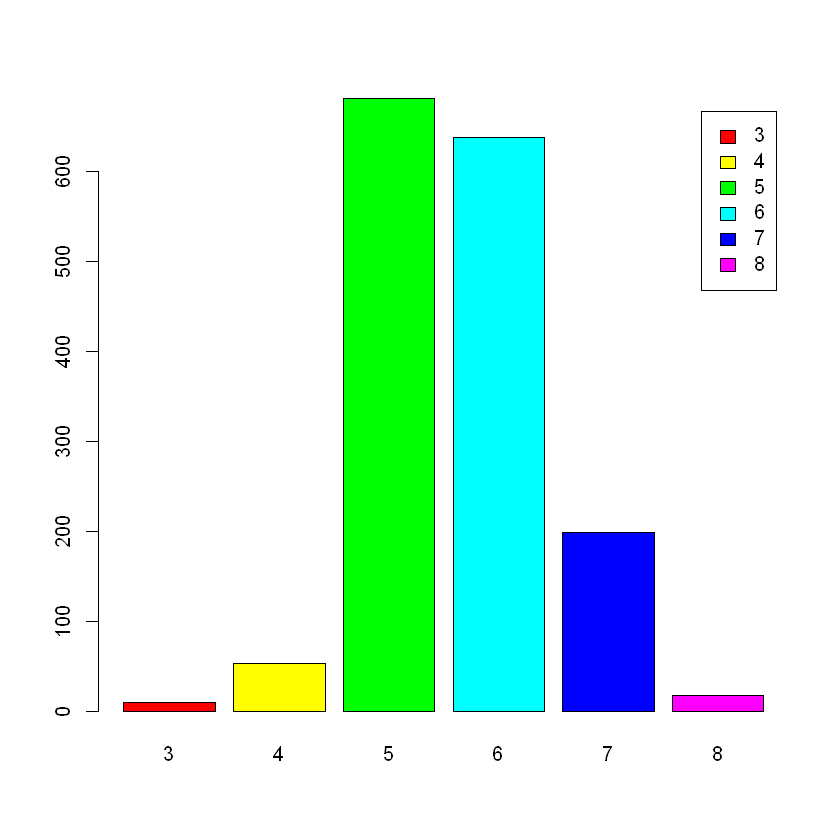

In [3]:
(tbl<-table(df$quality))
barplot(tbl,beside=T,legend=T,col=rainbow(6))

In [4]:
library(caret)
set.seed(123)
idx_train<-createDataPartition(y=df$quality,p=0.8,list=F)
train<-df[idx_train,]
X_train<-train[,-12]
y_train<-train[,12]
test<-df[-idx_train,]
X_test<-test[,-12]
y_test<-test[,12]

Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.2"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.2"

Warning message:
"package 'reshape' was built under R version 3.6.2"
Attaching package: 'reshape'

The following object is masked from 'package:dplyr':

    rename

Using  as id variables


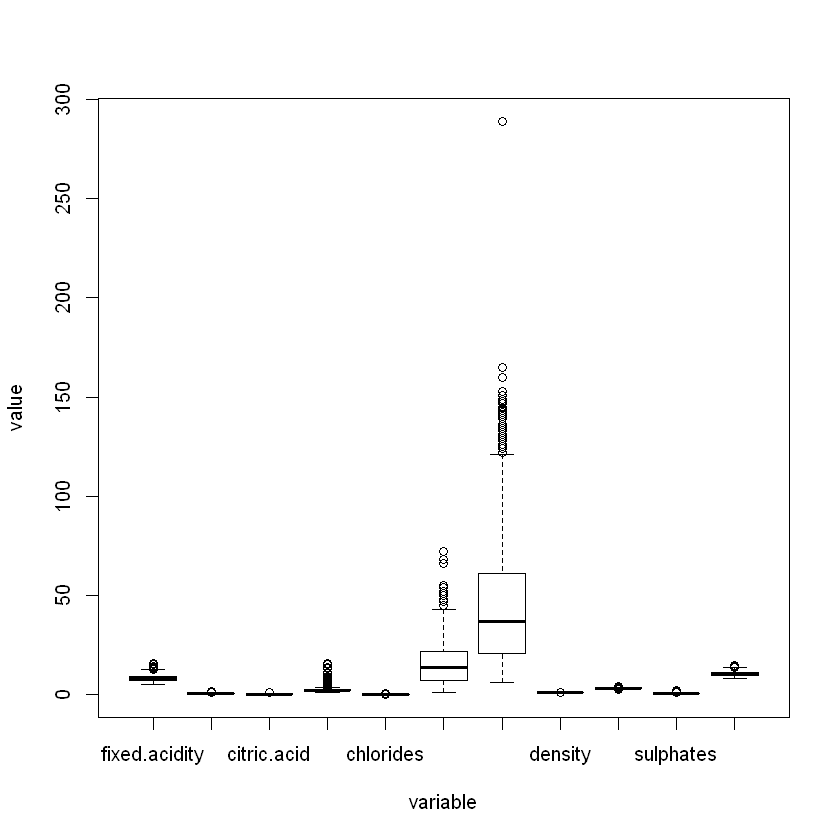

In [5]:
library(reshape)
#scaling 전의 박스플롯
meltData<-melt(X_train)
boxplot(data=meltData,value~variable)

In [6]:
#scale() 변수들의 평균,표준편차들 비슷하게 맞추고 데이터프레임으로 변환
X_train_scaled<-as.data.frame(scale(X_train))
X_test_scaled<-as.data.frame(scale(X_test))
#스케일링된 독립변수들과 종속변수 연결
train_scaled<-cbind(X_train_scaled,quality=y_train)
test_scaled<-cbind(X_test_scaled,qeality=y_test)

Using  as id variables


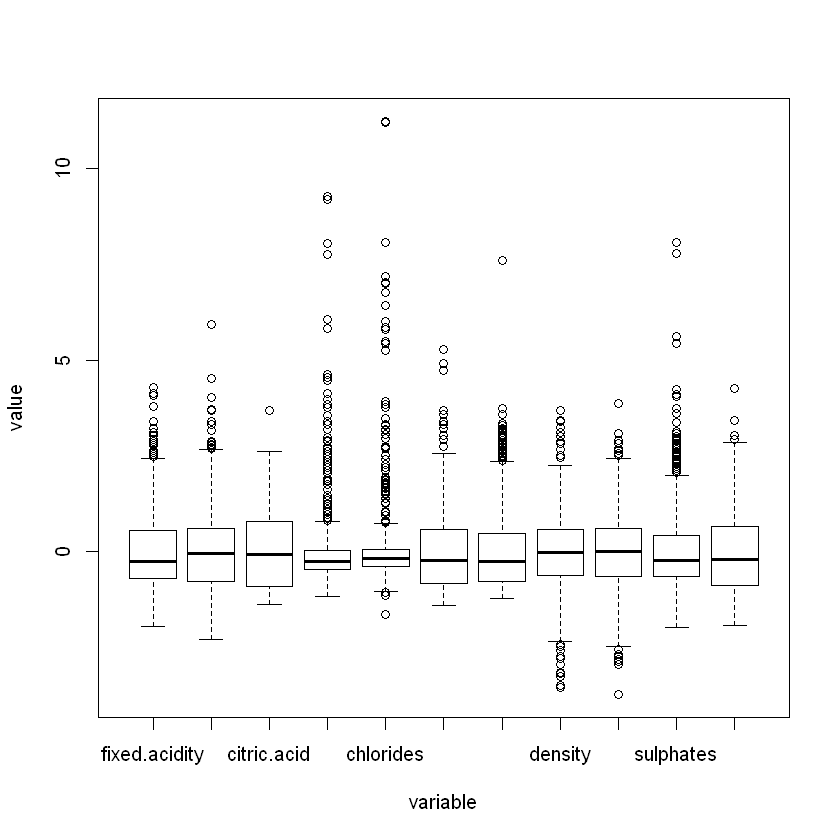

In [7]:
#scaling 후의 박스플롯
meltData<-melt(X_train_scaled)
boxplot(data=meltData,value~variable)

In [8]:
library(nnet)
#인공신경망 모형 만들기, hidden layer 의 노드 갯수 10
model<-nnet(quality ~ . , data=train, size=10)

# weights:  186
initial  value 2083.062747 
iter  10 value 1513.093057
iter  20 value 1439.316733
iter  30 value 1370.832524
iter  40 value 1267.704815
iter  50 value 1212.359956
iter  60 value 1188.440810
iter  70 value 1175.710867
iter  80 value 1172.577148
iter  90 value 1172.514538
iter 100 value 1171.909160
final  value 1171.909160 
stopped after 100 iterations


In [9]:
summary(model)
#11-10-6
#input-hidden-output

a 11-10-6 network with 186 weights
options were - softmax modelling 
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
   1.80   -0.07    2.90    1.30   -0.02    4.28    0.01    0.00    2.41    1.11 
i10->h1 i11->h1 
  -2.42   -0.78 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
  -0.13   -0.71   -0.51    0.51   -0.04    0.07   -0.10   -0.24    0.15    0.00 
i10->h2 i11->h2 
  -0.66   -0.44 
  b->h3  i1->h3  i2->h3  i3->h3  i4->h3  i5->h3  i6->h3  i7->h3  i8->h3  i9->h3 
  -3.74    5.04   -1.89   -1.44   12.54   -2.17    6.74   -3.66   -3.43   -1.74 
i10->h3 i11->h3 
  -9.99    1.37 
  b->h4  i1->h4  i2->h4  i3->h4  i4->h4  i5->h4  i6->h4  i7->h4  i8->h4  i9->h4 
   0.08   -0.25    0.02   -0.60    0.03    0.64   -0.02   -0.26   -0.67   -0.68 
i10->h4 i11->h4 
  -0.64   -0.58 
  b->h5  i1->h5  i2->h5  i3->h5  i4->h5  i5->h5  i6->h5  i7->h5  i8->h5  i9->h5 
  -0.02    0.63   -0.30    0.36    0.09   -0.29   -0.05    1.33   

Warning message:
"package 'devtools' was built under R version 3.6.2"Loading required package: usethis
Warning message:
"package 'usethis' was built under R version 3.6.2"SHA-1 hash of file is bf3c7b8ac910823b729e3ce73bb6ab5e6955ad3d
Loading required package: scales
Warning message:
"package 'scales' was built under R version 3.6.2"

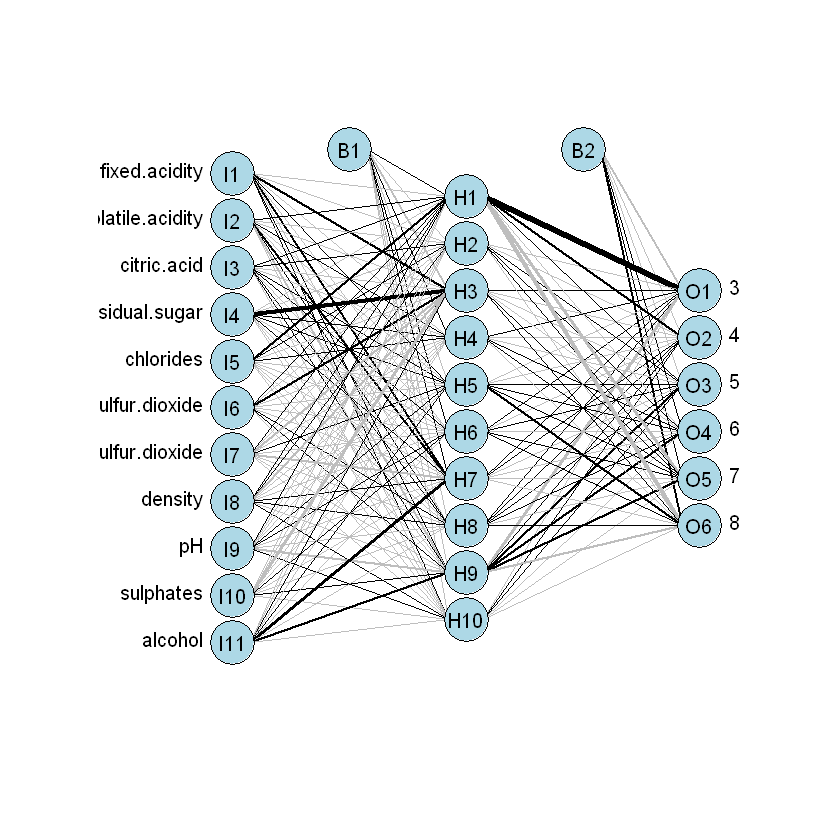

In [10]:
#인공신경망 그래프
library(devtools)

source_url('https://gist.githubusercontent.com/Peque/41a9e20d6687f2f3108d/raw/85e14f3a292e126f1454864427e3a189c2fe33f3/nnet_plot_update.r')

plot.nnet(model)

In [11]:
#학습용 데이터셋의 예측정확도
pred<-predict(model,X_train,type='class')
table(y_train,pred)
mean(y_train == pred)

       pred
y_train   3   5   6   7
      3   1   7   0   0
      4   1  29  12   1
      5   0 408 133   4
      6   0 160 311  40
      7   0   5 101  54
      8   0   0   9   6

[1] 0.6037441

In [12]:
#검증용 데이터셋의 예측정확도
pred<-predict(model,X_test,type='class')
table(y_test,pred)
mean(y_test == pred)

      pred
y_test   5   6   7
     3   1   1   0
     4   7   3   0
     5 106  29   1
     6  40  79   8
     7   3  22  14
     8   0   2   1

[1] 0.6277603